**Problem**: Consider that you have been recently hired as a data science consultant by a bank. Your first project aims to promote term deposits (aka fixed deposits) among existing customers. You have been given dataset of direct marketing campaigns via phone call where the end goal is to predict if the client will subscribe to the term deposit or not.

**Age**: Customer age

**Job**: type of job

**Marital**: marital status of customer

**Education**: education level of customer

**Default**: if customer has credit in default or not?

**balance**: balance level

**Housing**: if customer has housing loan or not?

**Loan**: if customer has personal loan or not?

**Contact**: contact communication type

**day**: last contact day of week

**Month**: last contact month of year

**Duration**: last contact duration, in seconds

**campaign**: # of contact performed during this campaign and for this client

**pdays**: # of days that passed by after the client was last contacted from a previous campaign

**previous**: # of contacts performed before this campaign and for this client

**Poutcome**: outcome of previous marketing campaign

**Y**: has the client subscribed a term deposit?


In [1]:
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
from matplotlib import pyplot as plt

# For over sampling and under sampling of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For split of the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing models to work with
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# To evaludate the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report

In [2]:
df = pd.read_csv("bank-full.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Observations

1. There are no missing values in the dataset. Though it seems that -1 in pdays is actually a value filled out in place of missing values.
2. There is no duplicates in the dataset.
3. There are some columns that does have outliers present in the dataset: balance, duration, campaign, pdays and previous.
4. Dataset looks clean and doesn't contain any garbage information.
5. There are total 7 numerical and 10 non numerical columns. Data types assigned to columns looks fine as well and doesn't require any changes in types.

In [10]:
categorical_cols = df.select_dtypes(['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(['int64', 'float']).columns.tolist()

In [11]:
# Categorical Univariate analysis on data
for col in categorical_cols:
    print(df[col].value_counts(normalize = True))
    print('------------------------------------')

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64
------------------------------------
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
------------------------------------
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64
------------------------------------
no     0.981973
yes    0.018027
Name: default, dtype: float64
------------------------------------
yes    0.555838
no     0.444162
Name: housing, dtype: float64
------------------------------------
no     0.839774
yes    0.160226
Name: loan, dtype: float64
------------------------------------
cellular     0.647741
unknown      0.287983


### Observations

1. Most of the columns have fine distributions except default which is heavily biased towards values of no. We can drop it after analyzing its impact on target.
2. We have atleast 60% people who are married.
3. We have atleast 51% people who completed their secondary education.
4. Most of the people in the dataset are coming from good job back grounds i.e. blue collar or management.
5. We have 2 similar categories i.e. cellular and telephone within contact. We can combine them into 1 category if they have similar impact on target as well.

In [12]:
# Columns to drop - Age and default doesn't seem to provide much of an impact on our target variable
df.drop(columns=['age', 'default'], inplace=True)

In [13]:
df.head()

,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
mapper = {'cellular': 'phone', 'telephone': 'phone', 'unknown': 'unknown'}
df.replace({'contact': mapper},inplace=True)

In [15]:
mapper = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df.replace({'month': mapper},inplace=True)

In [16]:
categorical_cols.remove('default')
categorical_cols.remove('month')
categorical_cols.remove('y')

df=pd.get_dummies(df,columns=categorical_cols, drop_first=True)

df.head()

,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,2143,5,5,261,1,-1,0,no,0,0,...,0,0,1,0,1,0,1,0,0,1
1,29,5,5,151,1,-1,0,no,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,5,5,76,1,-1,0,no,0,1,...,0,1,0,0,1,1,1,0,0,1
3,1506,5,5,92,1,-1,0,no,1,0,...,0,0,0,1,1,0,1,0,0,1
4,1,5,5,198,1,-1,0,no,0,0,...,1,0,0,1,0,0,1,0,0,1


In [17]:
## We will encode the target variable to 1 and 0 where 1 represents the people who have opted for term deposit.
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,2143,5,5,261,1,-1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,29,5,5,151,1,-1,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,5,5,76,1,-1,0,0,0,1,...,0,1,0,0,1,1,1,0,0,1
3,1506,5,5,92,1,-1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
4,1,5,5,198,1,-1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


## Train Test split

In [18]:
# specifying the independent and dependent set of variables
X = df.drop(["y"], axis=1)
Y = df["y"]

# splitting data in train and test sets
# A good rule of thumb is 70% data in train set and 30% data in test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [19]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (31647, 29)
Shape of test set : (13564, 29)
Percentage of classes in training set:
0    0.881885
1    0.118115
Name: y, dtype: float64
Percentage of classes in test set:
0    0.885653
1    0.114347
Name: y, dtype: float64


## Model fitting and evaulation

#### Gradient boosting

In [20]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

gb_model.score(X_train, y_train) # Calculate the accuracy on train set

0.9100072676715012

In [21]:
gb_model.score(X_test, y_test)

0.9079180182836921

In [22]:
print(classification_report(y_train, gb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     27909
           1       0.69      0.43      0.53      3738

    accuracy                           0.91     31647
   macro avg       0.81      0.70      0.74     31647
weighted avg       0.90      0.91      0.90     31647



In [23]:
print(classification_report(y_test, gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.66      0.41      0.50      1551

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564



In [24]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

gb_model_un = GradientBoostingClassifier()
gb_model_un.fit(X_train_un, y_train_un)

gb_model_un.score(X_train_un, y_train_un) # Calculate the accuracy on train set

0.8673087212413055

## Feature Importances

In [25]:
importances = gb_model_un.feature_importances_
importances

array([1.93033093e-02, 4.07297464e-02, 9.63798927e-02, 5.36571607e-01,
       1.06590853e-02, 3.13461940e-02, 2.92761293e-03, 2.78669211e-03,
       1.92740229e-04, 9.04645411e-04, 4.58637640e-04, 4.05386134e-04,
       0.00000000e+00, 4.92096747e-04, 5.36569104e-03, 2.63801189e-04,
       0.00000000e+00, 0.00000000e+00, 1.92853732e-03, 1.04796946e-04,
       1.36156027e-04, 3.52747426e-03, 1.91463614e-04, 4.93009615e-02,
       8.88747857e-03, 8.42938737e-02, 0.00000000e+00, 1.01581592e-01,
       1.26052805e-03])

In [26]:
indices = np.argsort(importances)

In [27]:
indices

array([17, 26, 12, 16, 19, 20, 22,  8, 15, 11, 10, 13,  9, 28, 18,  7,  6,
       21, 14, 24,  4,  0,  5,  1, 23, 25,  2, 27,  3], dtype=int64)

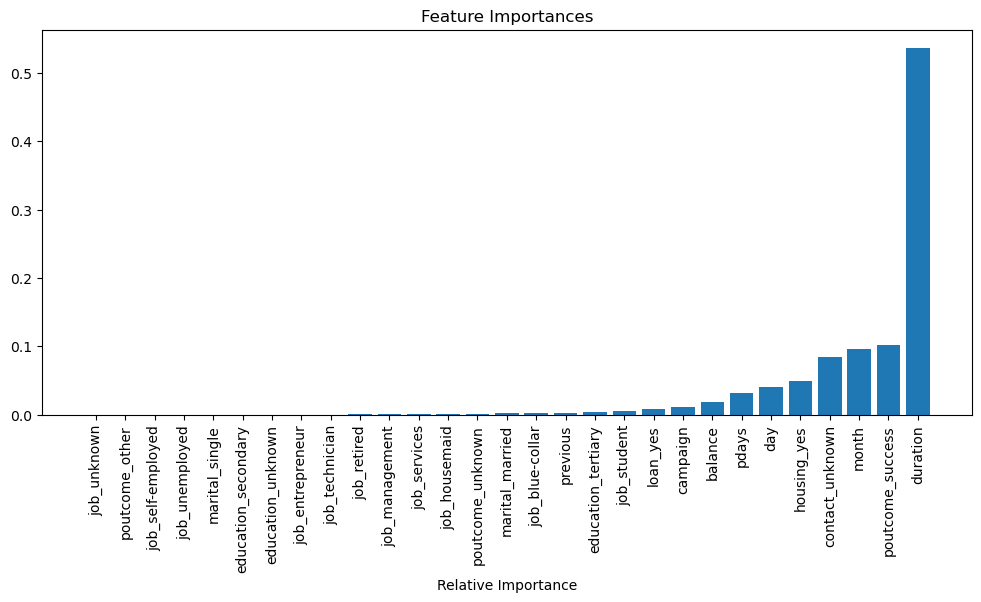

In [28]:
plt.figure(figsize=(12, 5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X_train_un.columns[i] for i in indices], rotation = 90)
plt.xlabel("Relative Importance")
plt.show()

## Observations:

The features having high contributions towards final outcome is (in descending order):
1. duration
2. poutcome success
3. month
4. contact_unknown
5. day
6. pdays
7. balance

# Predicted Probabilites

In [29]:
#The gradient boosting model with undersampled data trained on
#calculating the predicted probabilites
gb_model_un.predict_proba(X_train_un)

array([[0.923516  , 0.076484  ],
       [0.49573326, 0.50426674],
       [0.97525781, 0.02474219],
       ...,
       [0.0539587 , 0.9460413 ],
       [0.05401315, 0.94598685],
       [0.21029787, 0.78970213]])

In [30]:
#Finding only the postitive cases-2nd value
gb_model_un.predict_proba(X_train_un)[:, 1]

array([0.076484  , 0.50426674, 0.02474219, ..., 0.9460413 , 0.94598685,
       0.78970213])

In [31]:
y_train_un

16019    0
22658    0
10393    0
36221    0
28922    0
        ..
11631    1
34105    1
34246    1
44510    1
22926    1
Name: y, Length: 7476, dtype: int64

In [32]:
#stacking the arrays together and creating a dataframe
train_data = pd.DataFrame(np.stack([y_train_un, gb_model_un.predict_proba(X_train_un)[:, 1]], axis = 1))
train_data

,0,1
0,0.0,0.076484
1,0.0,0.504267
2,0.0,0.024742
3,0.0,0.018165
4,0.0,0.042524
...,...,...
7471,1.0,0.861104
7472,1.0,0.776449
7473,1.0,0.946041
7474,1.0,0.945987


In [33]:
#performing the similar stacking of the y test value and the predicted probability
test_data = pd.DataFrame(np.stack([y_test, gb_model_un.predict_proba(X_test)[:, 1]], axis = 1))
test_data

,0,1
0,0.0,0.039843
1,0.0,0.109645
2,0.0,0.844093
3,1.0,0.798698
4,0.0,0.088078
...,...,...
13559,0.0,0.126250
13560,0.0,0.455458
13561,0.0,0.197747
13562,0.0,0.034822


In [34]:
train_data.columns = ['y_actual', 'y_pred_proba']
test_data.columns = ['y_actual', 'y_pred_proba']

train_data.head()

,y_actual,y_pred_proba
0,0.0,0.076484
1,0.0,0.504267
2,0.0,0.024742
3,0.0,0.018165
4,0.0,0.042524


# Finding the Deciles and its Cumulative positive outcome

In [35]:
# We want to higher lables to lower value of predictions for final visualization
train_data['Deciles'] = pd.qcut( train_data.y_pred_proba, 10, labels = [10,9,8,7,6,5,4,3,2,1])
test_data['Deciles'] = pd.qcut( test_data.y_pred_proba, 10, labels = [10,9,8,7,6,5,4,3,2,1])

In [36]:
train_data

,y_actual,y_pred_proba,Deciles
0,0.0,0.076484,8
1,0.0,0.504267,6
2,0.0,0.024742,10
3,0.0,0.018165,10
4,0.0,0.042524,9
...,...,...,...
7471,1.0,0.861104,3
7472,1.0,0.776449,4
7473,1.0,0.946041,1
7474,1.0,0.945987,1


## Predicted probabilities and actual labels distribution across different deciles of the data

In [37]:
train_deciles = train_data.groupby('Deciles')[['y_pred_proba', 'y_actual']].agg( {'y_pred_proba' : ['min', 'max'],
        'y_actual' : ['sum', 'count']} ).reset_index().sort_values(by = 'Deciles', ascending = False)
train_deciles

Deciles y_pred_proba           y_actual      
                   min       max      sum count
9       1     0.921068  0.991230    721.0   748
8       2     0.877629  0.921065    704.0   747
7       3     0.816060  0.877550    660.0   748
6       4     0.723978  0.815813    619.0   747
5       5     0.559392  0.723904    519.0   748
4       6     0.340890  0.558583    344.0   747
3       7     0.155879  0.340725    129.0   748
2       8     0.074841  0.155223     35.0   747
1       9     0.036769  0.074828      5.0   748
0      10     0.010742  0.036759      2.0   748

In [38]:
test_deciles = test_data.groupby('Deciles')[['y_pred_proba', 'y_actual']].agg( {'y_pred_proba' : ['min', 'max'],
        'y_actual' : ['sum', 'count']} ).reset_index().sort_values(by = 'Deciles', ascending = False)
test_deciles

Deciles y_pred_proba           y_actual      
                   min       max      sum count
9       1     0.829793  0.984947    796.0  1357
8       2     0.625166  0.829719    438.0  1356
7       3     0.418776  0.625056    190.0  1356
6       4     0.245343  0.418501     85.0  1357
5       5     0.147415  0.245306     25.0  1356
4       6     0.091144  0.147398     11.0  1354
3       7     0.057974  0.091143      3.0  1359
2       8     0.040456  0.057938      1.0  1356
1       9     0.027078  0.040456      2.0  1356
0      10     0.010416  0.027050      0.0  1357

Various statistics (minimum, maximum, sum, and count) for the 'y_pred_proba' and 'y_actual' columns within each decile group are calculated

# Gain Calculation

1.Renaming columns to find the positive count and total count

In [39]:
train_deciles.columns = train_deciles.columns.droplevel()
train_deciles.columns = ['Deciles', 'Pred_min', 'Pred_max', 'Did Term deposit', 'Total']
train_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,Total
9,1,0.921068,0.991230,721.0,748
8,2,0.877629,0.921065,704.0,747
7,3,0.816060,0.877550,660.0,748
6,4,0.723978,0.815813,619.0,747
5,5,0.559392,0.723904,519.0,748
4,6,0.340890,0.558583,344.0,747
3,7,0.155879,0.340725,129.0,748
2,8,0.074841,0.155223,35.0,747
1,9,0.036769,0.074828,5.0,748
0,10,0.010742,0.036759,2.0,748


2. find cumulative term deposit

In [40]:
train_deciles['Did Term deposit %'] = train_deciles['Did Term deposit'] / train_deciles['Did Term deposit'].sum()
train_deciles['Cumulative Term deposit %'] = np.cumsum(train_deciles['Did Term deposit %'])

In [41]:
train_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,Total,Did Term deposit %,Cumulative Term deposit %
9,1,0.921068,0.991230,721.0,748,0.192884,0.192884
8,2,0.877629,0.921065,704.0,747,0.188336,0.381220
7,3,0.816060,0.877550,660.0,748,0.176565,0.557785
6,4,0.723978,0.815813,619.0,747,0.165597,0.723381
5,5,0.559392,0.723904,519.0,748,0.138844,0.862226
4,6,0.340890,0.558583,344.0,747,0.092028,0.954254
3,7,0.155879,0.340725,129.0,748,0.034510,0.988764
2,8,0.074841,0.155223,35.0,747,0.009363,0.998127
1,9,0.036769,0.074828,5.0,748,0.001338,0.999465
0,10,0.010742,0.036759,2.0,748,0.000535,1.000000


# Lift Calculation

1. Find the no term deposit

In [42]:
train_deciles['No Term deposit'] = train_deciles.Total - train_deciles['Did Term deposit']

In [43]:
train_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,Total,Did Term deposit %,Cumulative Term deposit %,No Term deposit
9,1,0.921068,0.991230,721.0,748,0.192884,0.192884,27.0
8,2,0.877629,0.921065,704.0,747,0.188336,0.381220,43.0
7,3,0.816060,0.877550,660.0,748,0.176565,0.557785,88.0
6,4,0.723978,0.815813,619.0,747,0.165597,0.723381,128.0
5,5,0.559392,0.723904,519.0,748,0.138844,0.862226,229.0
4,6,0.340890,0.558583,344.0,747,0.092028,0.954254,403.0
3,7,0.155879,0.340725,129.0,748,0.034510,0.988764,619.0
2,8,0.074841,0.155223,35.0,747,0.009363,0.998127,712.0
1,9,0.036769,0.074828,5.0,748,0.001338,0.999465,743.0
0,10,0.010742,0.036759,2.0,748,0.000535,1.000000,746.0


2. Finding the lift

In [44]:
train_deciles['lift'] = train_deciles.apply(lambda x: (x['Cumulative Term deposit %']*100) / (x['Deciles'] * 10), axis=1)
train_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,Total,Did Term deposit %,Cumulative Term deposit %,No Term deposit,lift
9,1,0.921068,0.991230,721.0,748,0.192884,0.192884,27.0,1.928839
8,2,0.877629,0.921065,704.0,747,0.188336,0.381220,43.0,1.906100
7,3,0.816060,0.877550,660.0,748,0.176565,0.557785,88.0,1.859283
6,4,0.723978,0.815813,619.0,747,0.165597,0.723381,128.0,1.808454
5,5,0.559392,0.723904,519.0,748,0.138844,0.862226,229.0,1.724452
4,6,0.340890,0.558583,344.0,747,0.092028,0.954254,403.0,1.590423
3,7,0.155879,0.340725,129.0,748,0.034510,0.988764,619.0,1.412520
2,8,0.074841,0.155223,35.0,747,0.009363,0.998127,712.0,1.247659
1,9,0.036769,0.074828,5.0,748,0.001338,0.999465,743.0,1.110517
0,10,0.010742,0.036759,2.0,748,0.000535,1.000000,746.0,1.000000


# Same for test Dataset

In [45]:
test_deciles.columns = test_deciles.columns.droplevel()
test_deciles.columns = ['Deciles', 'Pred_min', 'Pred_max', 'Did Term deposit', 'Total']
test_deciles['No Term deposit'] = test_deciles.Total - test_deciles['Did Term deposit']

test_deciles['Did Term deposit %'] = test_deciles['Did Term deposit'] / test_deciles['Did Term deposit'].sum()
test_deciles['Cumulative Term deposit %'] = np.cumsum(test_deciles['Did Term deposit %'])
test_deciles['lift'] = test_deciles.apply(lambda x: (x['Cumulative Term deposit %']*100) / (x['Deciles'] * 10), axis=1)
test_deciles

,Deciles,Pred_min,Pred_max,Did Term deposit,Total,No Term deposit,Did Term deposit %,Cumulative Term deposit %,lift
9,1,0.829793,0.984947,796.0,1357,561.0,0.513217,0.513217,5.132173
8,2,0.625166,0.829719,438.0,1356,918.0,0.282398,0.795616,3.978079
7,3,0.418776,0.625056,190.0,1356,1166.0,0.122502,0.918117,3.060391
6,4,0.245343,0.418501,85.0,1357,1272.0,0.054803,0.972921,2.432302
5,5,0.147415,0.245306,25.0,1356,1331.0,0.016119,0.989039,1.978079
4,6,0.091144,0.147398,11.0,1354,1343.0,0.007092,0.996132,1.660219
3,7,0.057974,0.091143,3.0,1359,1356.0,0.001934,0.998066,1.425808
2,8,0.040456,0.057938,1.0,1356,1355.0,0.000645,0.998711,1.248388
1,9,0.027078,0.040456,2.0,1356,1354.0,0.001289,1.000000,1.111111
0,10,0.010416,0.027050,0.0,1357,1357.0,0.000000,1.000000,1.000000


## Gains Curve

Gains is cumulative positive observations in a decile to total positive observations in the data.

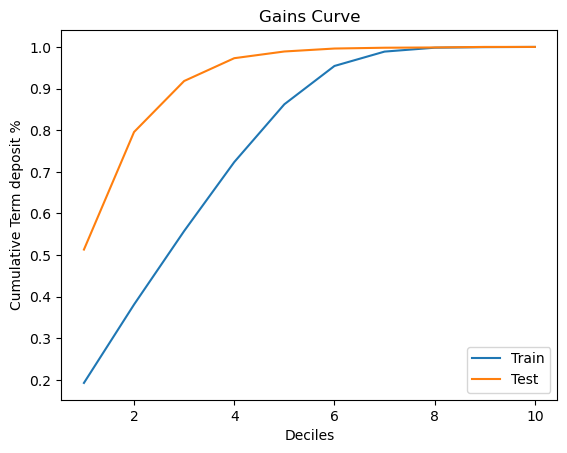

In [46]:
plt.plot(train_deciles.Deciles, train_deciles['Cumulative Term deposit %'])
plt.plot(test_deciles.Deciles, test_deciles['Cumulative Term deposit %'])

plt.legend(["Train", "Test"], loc ="lower right")
plt.xlabel('Deciles')
plt.ylabel('Cumulative Term deposit %')
plt.title('Gains Curve')
plt.show()

## Lift Curve

Lift is positive observations in a decile calculated form model compared to expected positives in a decile based on a random model.


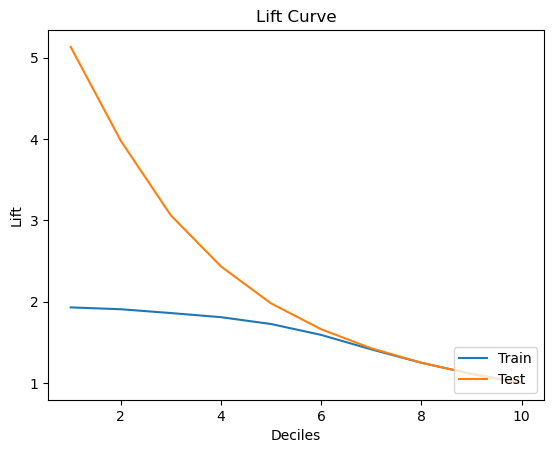

In [47]:
plt.plot(train_deciles.Deciles, train_deciles['lift'])
plt.plot(test_deciles.Deciles, test_deciles['lift'])

plt.legend(["Train", "Test"], loc ="lower right")
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.show()

## Observations:

1. From gain and lift chart it's witnessed that we are doing a great job in preductions with gradient boosing over undersampled data.

    a. If we examine gains chart closely, our model is able to segregate the people making term deposits in initial deciles with high frequencies.
    
    b. The similar impact can be seen via lift where we are able to witness as much as 5 times more impact compared to a random model. This clearly signifies that we able to capture good results with high recall score.
    
    c. We can further employ our workforce to the higher set of deciles where we have higher chances of term deposits from individuals and can put the individuals in lower deciles at low priority.

In [ ]:
import matplotlib.pyplot as plt

# Define the deciles and corresponding gain percentages
deciles = ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10"]
gain_percentages = [33, 67, 100, 100, 100, 100, 100, 100, 100, 100]

# Create a cumulative gain list
cumulative_gain = [gain_percentages[0]]
for i in range(1, len(gain_percentages)):
    cumulative_gain.append(cumulative_gain[i - 1] + gain_percentages[i])

# Plot the gain chart
plt.figure(figsize=(8, 6))
plt.plot(deciles, cumulative_gain, marker='o', linestyle='-', color='b')
plt.xlabel('Decile')
plt.ylabel('Cumulative Gain (%)')
plt.title('Gain Chart')
plt.grid(True)

# Show the plot
plt.show()
